In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Import Data

In [26]:
sue_df = pd.read_csv("actual_sp500_stock_es.csv")
name_df = pd.read_csv("company_name.csv")

In [3]:
sue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439956 entries, 0 to 439955
Data columns (total 12 columns):
OFTIC        439956 non-null object
anndats      439956 non-null object
TICKER       439956 non-null object
MEASURE      439956 non-null object
FISCALP      439956 non-null object
PYEAR        439956 non-null int64
PMON         439956 non-null int64
USFIRM       439956 non-null int64
actual       413757 non-null float64
surpmean     439956 non-null float64
surpstdev    334039 non-null float64
suescore     312485 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 40.3+ MB


In [30]:
sue_df = sue_df[(sue_df['MEASURE']=='EPS') & (sue_df['USFIRM']==1)]
combine_df = pd.merge(sue_df, name_df, left_on='TICKER', right_on='tic', how='inner')
combine_df.head()

,OFTIC,anndats,TICKER,MEASURE,FISCALP,PYEAR,PMON,USFIRM,actual,surpmean,...,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,costat
0,AA,2000-01-10,AA,EPS,QTR,1999,12,1,1.335,1.15385,...,20181231,2018,INDL,C,D,STD,AA,ALCOA CORP,USD,A
1,AA,2000-04-06,AA,EPS,QTR,2000,3,1,1.425,1.35625,...,20181231,2018,INDL,C,D,STD,AA,ALCOA CORP,USD,A
2,AA,2000-07-10,AA,EPS,QTR,2000,6,1,1.410,1.41125,...,20181231,2018,INDL,C,D,STD,AA,ALCOA CORP,USD,A
3,AA,2000-10-05,AA,EPS,QTR,2000,9,1,1.260,1.34875,...,20181231,2018,INDL,C,D,STD,AA,ALCOA CORP,USD,A
4,AA,2001-01-08,AA,EPS,QTR,2000,12,1,1.350,1.28250,...,20181231,2018,INDL,C,D,STD,AA,ALCOA CORP,USD,A


### Data Cleaning & Feature Engineering

In [55]:
eps_df = combine_df.loc[:, ['TICKER', 'conm', 'PYEAR', 'PMON', 'suescore']]
eps_df.describe()

,PYEAR,PMON,suescore
count,22737.000000,22737.000000,22472.000000
mean,2009.194617,7.177332,1.434950
std,5.464804,3.415661,4.769791
min,1999.000000,1.000000,-137.628600
25%,2005.000000,3.000000,-0.029235
50%,2009.000000,6.000000,1.028980
75%,2014.000000,9.000000,2.541393
max,2018.000000,12.000000,147.786730


In [56]:
# remove outliers
quantile = eps_df['suescore'].quantile([0.01, 0.99])
surp_df = eps_df[(eps_df['suescore']>=quantile.iloc[0]) & (eps_df['suescore']<=quantile.iloc[1])]
surp_df.head()

,TICKER,conm,PYEAR,PMON,suescore
0,AA,ALCOA CORP,1999,12,5.64507
1,AA,ALCOA CORP,2000,3,0.53647
2,AA,ALCOA CORP,2000,6,-0.00815
3,AA,ALCOA CORP,2000,9,-0.58508
4,AA,ALCOA CORP,2000,12,0.83302


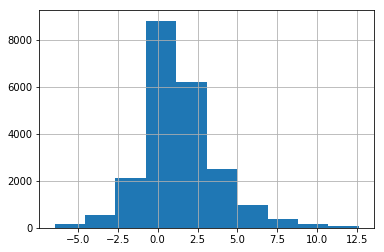

In [57]:
surp_df['suescore'].hist()

In [58]:
eps_df[eps_df['suescore']>=10].drop_duplicates()

,TICKER,conm,PYEAR,PMON,suescore
98,AAPL,APPLE INC,2006,12,11.30582
110,AAPL,APPLE INC,2009,12,11.93050
153,ABBV,ABBVIE INC,2014,9,12.92551
313,ADBE,ADOBE INC,2017,2,10.89850
358,ADI,ANALOG DEVICES,2009,4,18.13989
360,ADI,ANALOG DEVICES,2009,10,15.01789
384,ADI,ANALOG DEVICES,2015,10,30.86478
388,ADI,ANALOG DEVICES,2016,10,13.96626
389,ADI,ANALOG DEVICES,2017,1,10.16079
432,ADM,ARCHER-DANIELS-MIDLAND CO,2008,9,10.55027


### Time Series Analysis

In [74]:
ticker_size = eps_df.groupby(['TICKER']).size()
max_ticker = ticker_size[ticker_size==ticker_size.max()].index[0]
ts_df = eps_df[eps_df['TICKER']==max_ticker]
ts_df['date'] = ts_df.apply(lambda x: pd.to_datetime('{}/{}/01'.format(x['PYEAR'], x['PMON'])), axis=1)
ts_df = ts_df.set_index(['date'])
ts_df = ts_df.resample('Q').last()
ts_df.head()

/Users/niniliu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,TICKER,conm,PYEAR,PMON,suescore
date,,,,,
1999-12-31,CB,CHUBB LTD,1999,12,0.23743
2000-03-31,CB,CHUBB LTD,2000,3,-1.72672
2000-06-30,CB,CHUBB LTD,2000,6,0.56470
2000-09-30,CB,CHUBB LTD,2000,9,-1.55563
2000-12-31,CB,CHUBB LTD,2000,12,-3.00000


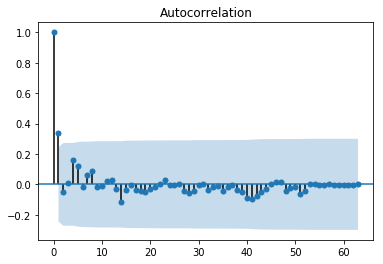

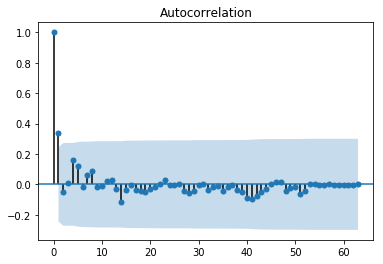

In [75]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts_df['suescore'])

In [76]:
from arch import arch_model
am = arch_model(ts_df['suescore'])
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 211.20809228543345
Iteration:      2,   Func. Count:     14,   Neg. LLF: 210.69712025397996
Iteration:      3,   Func. Count:     20,   Neg. LLF: 190.73834013250087
Iteration:      4,   Func. Count:     31,   Neg. LLF: 188.39528687146316
Iteration:      5,   Func. Count:     38,   Neg. LLF: 187.68367641587696
Iteration:      6,   Func. Count:     45,   Neg. LLF: 186.9531101620148
Iteration:      7,   Func. Count:     51,   Neg. LLF: 186.74606716691886
Iteration:      8,   Func. Count:     57,   Neg. LLF: 186.52941582930853
Iteration:      9,   Func. Count:     63,   Neg. LLF: 186.52271195010644
Iteration:     10,   Func. Count:     69,   Neg. LLF: 186.52267678974022
Iteration:     11,   Func. Count:     75,   Neg. LLF: 186.5226497283683
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 186.52264972832447
            Iterations: 15
            Function evaluations: 75
            Grad

/Users/niniliu/anaconda/lib/python3.6/site-packages/arch/univariate/base.py:571: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


In [77]:
res

                     Constant Mean - GARCH Model Results                      
Dep. Variable:               suescore   R-squared:                      -0.031
Mean Model:             Constant Mean   Adj. R-squared:                 -0.031
Vol Model:                      GARCH   Log-Likelihood:               -186.523
Distribution:                  Normal   AIC:                           381.045
Method:            Maximum Likelihood   BIC:                           389.681
                                        No. Observations:                   64
Date:                Wed, Apr 03 2019   Df Residuals:                       60
Time:                        22:51:01   Df Model:                            4
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.6244      0.462      3.519  4.330e-04 [  0.720,  2.52